In [1]:
import numpy as np
from time import time
import pickle
import gc

In [2]:
f = open('test.bin', 'rb')
mat = pickle.load(f)

In [3]:
mat = mat[1:-1]

In [4]:
for i in range(len(mat)):
    mat[i].pop()
    mat[i].pop(0)
    

In [5]:
np.array(mat).shape

(98, 98)

In [6]:
k = np.array(mat)

In [7]:
for i in range(len(mat)):
    for j in range(len(mat)):
        if k[i][j] == 2:
            start = (i, j)
        if k[i][j] == 3:
            goal = (i, j)
            
k[start] = 0
k[goal] = 0

In [8]:
obj = k.copy()

In [ ]:
obj = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
obj = np.array(obj)

In [ ]:
obj

In [ ]:
# shape

In [9]:
def pi(a):
    for i in range(len(a)):
        if a[i] == np.nan:
            a[i] = 0
            
    s = np.nansum(a)
    if s == 0:
        s = 1e-5
#         print('here')
    for i in range(len(a)):
        a[i] /= s
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [10]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [11]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        v[s][a] = v[s][a] + lr * (r + gamma*np.max(v[s_next]) - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [12]:
def is_wall(s):
    a = shape[0] - 1
    b = shape[1] -1
    if s[0] < 0 or s[0] > a:
        return True
    elif s[1] < 0 or s[1] > b:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [13]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps -= 1e-5
        temp_hist.append(s)
        a = action(s)
        s_next = state_map(s, a)
#         print(a, s_next)
        
        if is_wall(s_next):
            fail_hist.append((s, s_next))
            v[s][a] = 0
            v[s] = pi(v[s])
            s_next = (0, 0)
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
            
#         print(v[s])
        fake_obj[s_next] = 2
#         print(fake_obj)
        fake_obj[s_next] = obj[s_next]
#         print(eps)
            
        s = s_next
#         print(s)
        
    hist.append(temp_hist)

In [14]:
shape = obj.shape
value = mat.copy()

for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)

In [15]:
gc.collect()

20

In [16]:
%%time
lr = 0.1
eps = 0.3
gamma = 0.9
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()

s_0 = start
goal = goal

start = time()
for i in range(100):
    play(s_0)
    print('succes', i)
    eps = 0.1 * (0.99 ** i)

lt = time() - start

succes 0
succes 1
succes 2
succes 3
succes 4
succes 5
succes 6
succes 7
succes 8
succes 9
succes 10
succes 11
succes 12
succes 13
succes 14
succes 15
succes 16
succes 17
succes 18
succes 19
succes 20
succes 21
succes 22
succes 23
succes 24
succes 25
succes 26
succes 27
succes 28
succes 29
succes 30
succes 31
succes 32
succes 33
succes 34
succes 35
succes 36
succes 37
succes 38
succes 39
succes 40
succes 41
succes 42
succes 43
succes 44
succes 45
succes 46
succes 47
succes 48
succes 49
succes 50
succes 51
succes 52
succes 53
succes 54
succes 55
succes 56
succes 57
succes 58
succes 59
succes 60
succes 61
succes 62
succes 63
succes 64
succes 65
succes 66
succes 67
succes 68
succes 69
succes 70
succes 71
succes 72
succes 73
succes 74
succes 75
succes 76
succes 77
succes 78
succes 79
succes 80
succes 81
succes 82
succes 83
succes 84
succes 85
succes 86
succes 87
succes 88
succes 89
succes 90
succes 91
succes 92
succes 93
succes 94
succes 95
succes 96
succes 97
succes 98
succes 99
Wall time:

In [ ]:
v

In [ ]:
lr = 0.1
eps = 0.5
gamma = 0.9
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()

s_0 = (0, 0)
goal = (3, 4)

start = time()
for i in range(100):
    play(s_0)
    print('succes', i)
    print(eps)
    eps = 0.5

lt = time() - start

In [ ]:
v

In [ ]:
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]

In [ ]:
eps

In [ ]:
lt

In [ ]:
c = 0
for h in hist:
    if len(h) == 7:
        c += 1
        
print(c)

In [17]:
lh = list(map(lambda x: len(x), hist))

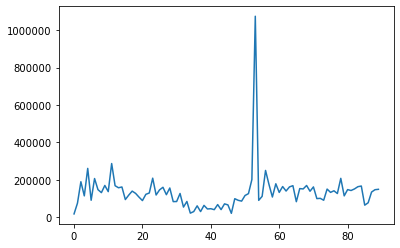

In [19]:
import matplotlib.pyplot as plt

plt.plot(lh[10:])

In [20]:
min(lh)

17625

In [21]:
eps

0.036972963764972645